# TLDR: Macro Avg. F1 = 0.73%

# Default Setup

In [ ]:
# Dataloading Stuff
from google.colab import drive
from sys import path
import os

# Standard Stuff
!pip3 install numpy sklearn iterative-stratification pandas pyss3
from sklearn.model_selection import train_test_split

from pyss3 import SS3
from pyss3.util import Dataset, Evaluation, span

import numpy as np
import pandas as pd

drive.mount('/content/drive', force_remount=True)
path_root = '/content/drive/My Drive/NLP Lab/SingleLabel/'
path.append(path_root)
data_root = 'data/'

     |████████████████████████████████| 2.0MB 3.1MB/s 
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Load Data

In [ ]:
with open(path_root + data_root + 'BeerReview/test.txt', 'r') as text_file:
  text = text_file.read().split('\n')

with open(path_root + data_root + 'BeerReview/test_label.txt', 'r') as label_file:
  label = label_file.read().split('\n')

X_train, X_val, y_train, y_val = train_test_split(text, label, test_size = 0.2)

## Classify Dataset

Classification: 100%|██████████| 1848/1848 [00:00<00:00, 2551.59it/s]



              precision    recall  f1-score   support

        None       0.54      0.70      0.61       179
        feel       0.82      0.77      0.80       194
        look       0.93      0.90      0.91       338
     overall       0.80      0.61      0.69       420
       smell       0.66      0.77      0.71       284
       taste       0.64      0.69      0.66       432

   micro avg       0.73      0.73      0.73      1847
   macro avg       0.73      0.74      0.73      1847
weighted avg       0.74      0.73      0.73      1847


 Accuracy: 0.729

[ updating evaluations cache ]


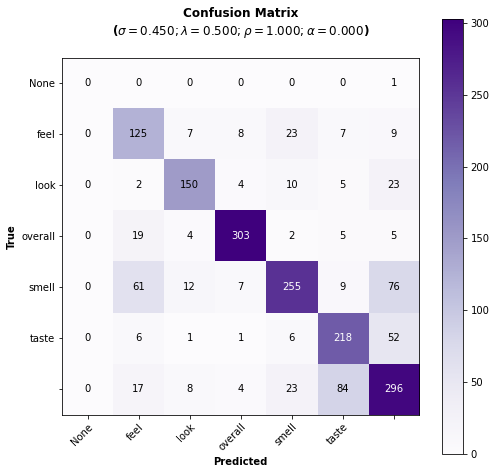

0.7308549933777854

In [ ]:
clf = SS3()
clf.fit(X_train, y_train, n_grams=5)
Evaluation.test(clf, X_val, y_val, metric="f1-score")